In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

plt.style.use("ggplot")
warnings.filterwarnings("ignore")

In [10]:
ruta="D:\\J\\Big data\\DATAHACK\\PYTHON\\006-_Caso_segmentacion\FMCG\\"
archivo="segmentation data.csv"

In [11]:
df=pd.read_csv(ruta+archivo,sep=",")

In [12]:
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


Pretratamiento

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [14]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


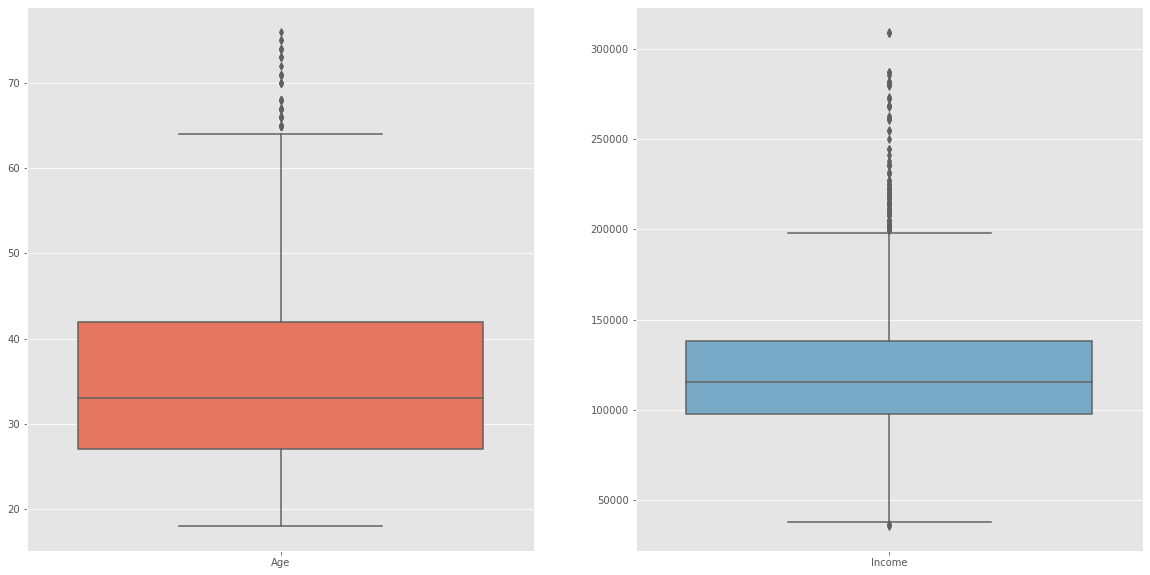

In [26]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
sns.boxplot(data=df[["Age"]],ax=axes[0],palette='Reds')
sns.boxplot(data=df[["Income"]],ax=axes[1],palette='Blues');

Prueba 1: mantenemos como numéricas la edad y los ingresos y el resto como categóricas.

Pâra las categóricas onehot, para las numéricas, standard scaler

In [35]:
numericas=["Age","Income"]
Ids=["ID"]
categoricas=[s for s in df.columns if (s not in numericas) and (s not in Ids)]

In [36]:

categoricas

['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

In [37]:
encoder=OneHotEncoder(handle_unknown='ignore')

In [38]:
encoder.fit(df[categoricas])

OneHotEncoder(handle_unknown='ignore')

In [45]:
encoder.transform(df[categoricas]).toarray()

array([[1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.]])

In [47]:
pd.get_dummies(df["Sex"])

,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
1995,0,1
1996,0,1
1997,1,0
1998,0,1
